https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

https://keras.io/applications/
https://keras.io/ja/applications/

https://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/

https://shuaiw.github.io/2017/02/01/deep-learning-model-as-rest-api.html

https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html?utm_content=buffer68ca7&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer

https://github.com/awentzonline/image-analogies

https://hazm.at/mox/machine-learning/computer-vision/classification/keras-pre-trained/index.html

In [1]:
crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'


In [18]:
url = tiger

In [19]:
import urllib.request
import cv2
import numpy as np

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

In [5]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
import numpy as np

#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')


C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


17227776/17225924 [==============================] - 11s 1us/step


PIL image size 150528


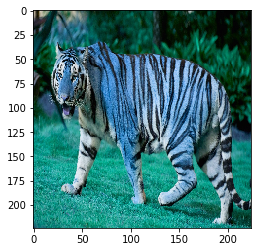

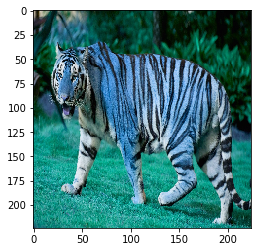

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


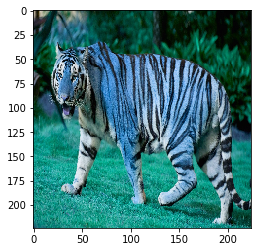

In [20]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
original = url_to_image(url, 224)
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

tiger 0.7657881
tiger_cat 0.18945964
zebra 0.02654436
tabby 0.0033923516
triceratops 0.0022241487


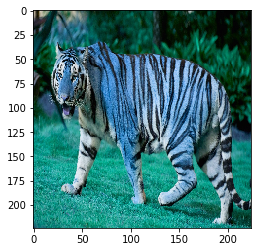

In [21]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

In [22]:
vgg_model.save('imagenet_vgg_model.hdf5')
inception_model.save('imagenet_inception_model.hdf5')
resnet_model.save('imagenet_resnet_model.hdf5')
mobilenet_model.save('imagenet_mobilenet_model.hdf5')

pick 0.40647873
crayfish 0.04093311
mouse 0.040858775
spotlight 0.034589313
bucket 0.03448283


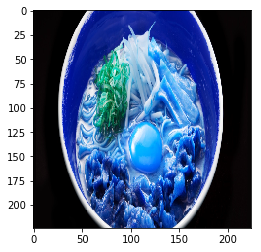

In [56]:
import urllib.request
import cv2
import numpy as np

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'
fujisan = 'https://upload.wikimedia.org/wikipedia/commons/3/3e/MtFuji_FujiCity.jpg?uselang=ja'
pi = 'https://image.yodobashi.com//product/100/000/001/004/044/760/100000001004044760_10204.jpg'
bomb = 'https://upload.wikimedia.org/wikipedia/commons/e/e0/Nagasakibomb.jpg'
sea = 'https://d2goguvysdoarq.cloudfront.net/system/article_assets/attachments/603/normal.jpg'
ramen = 'http://7-men.com/wp-content/themes/menou/common/images/mainphoto01.jpg'

url = ramen

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

original = url_to_image(url, 224)
#print('PIL image size',original.size)
#plt.imshow(original)
#plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
#plt.imshow(np.uint8(numpy_image))
#plt.show()
#print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
#print('image batch size', image_batch.shape)
#plt.imshow(np.uint8(image_batch[0]))

# prepare the image for the VGG model
processed_image = resnet50.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
    print(prediction[1], prediction[2])

In [46]:
#NG

import urllib.request
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

InceptionResNetV2_model = InceptionResNetV2(include_top=False, weights='imagenet')

crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'

fujisan = 'https://www.google.co.jp/imgres?imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fja%2F3%2F3e%2FMtFuji_FujiCity.jpg&imgrefurl=https%3A%2F%2Fja.wikipedia.org%2Fwiki%2F%25E5%25AF%258C%25E5%25A3%25AB%25E5%25B1%25B1&docid=jh07zLV6rcKsaM&tbnid=Tk2GoW00zmZqvM%3A&vet=10ahUKEwjL-5vdkqnhAhVD6bwKHXkYCdEQMwjcASgAMAA..i&w=1693&h=952&bih=702&biw=1536&q=%E3%81%B5%E3%81%98%E3%81%95%E3%82%93&ved=0ahUKEwjL-5vdkqnhAhVD6bwKHXkYCdEQMwjcASgAMAA&iact=mrc&uact=8'
    
url = fujisan

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

original = url_to_image(url, 224)
#print('PIL image size',original.size)
#plt.imshow(original)
#plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
#plt.imshow(np.uint8(numpy_image))
#plt.show()
#print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
#print('image batch size', image_batch.shape)
#plt.imshow(np.uint8(image_batch[0]))

# prepare the image for the VGG model
#processed_image = preprocess_input(image_batch.copy())
processed_image = preprocess_input(image_batch.copy())
    
# get the predicted probabilities for each class
predictions = InceptionResNetV2_model.predict(processed_image)


# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

KeyboardInterrupt: 

In [27]:
InceptionResNetV2_model.save('imagenet_InceptionResNetV2_model.hdf5')

In [45]:
crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'
url = tiger

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

original = url_to_image(url, 224)
#print('PIL image size',original.size)
#plt.imshow(original)
#plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
file = img_to_array(original)
#plt.imshow(np.uint8(numpy_image))
#plt.show()
#print('numpy array size',numpy_image.shape)

import sys
import numpy as np
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

model = InceptionResNetV2()

def predict(files, top=10):
  # すべての画像を読み込み
  #images = [load_img(f, target_size=(299, 299)) for f in files]   # 299x299 リサイズ済み RGB 画像の読み込み
  #images = [img_to_array(image) for image in images]              # Pillow 形式を Numpy 配列に変換
  #images = [preprocess_input(image) for image in images]          # RGB からモデル学習時の入力形式に変換
  images = preprocess_input(file) 
  images = np.stack(images)

  # すべての画像の分類ごとの生起確率を求める
  probs = model.predict(images)

  # 生起確率の配列を分類ラベルと対応させ上位 n 件を抽出する
  result = []
  for labeled_prob in decode_predictions(probs, top=top):
    # (id, label, probability) × top
    result.append(sorted(labeled_prob, key=lambda x: -x[2])[:top])
  return result

#if __name__ == "__main__":
#  files = sys.argv[1:]
#  if len(files) > 0:
#    for file, probs in zip(files, predict(files)):
#      print("[%s]" % file)
#      for (id, label, prob) in probs:
#        print("  %.3f %s" % (prob, label))


if len(files) > 0:
    for file, probs in zip(files, predict(files)):
        print("[%s]" % file)
        for (id, label, prob) in probs:
            print("  %.3f %s" % (prob, label))

ValueError: Error when checking : expected input_16 to have 4 dimensions, but got array with shape (224, 224, 3)